In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

In [2]:
med_cost=pd.read_csv("medical_cost.csv")
med_cost.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Create bins for Age
bins=[0,24,30,40,50,60,999]
bin_labels=["18-24", "25-30" ,"31-40", "41-50", "51-60", "61 and above"]
med_cost["Age Range"]=pd.cut(med_cost['age'],bins, labels = bin_labels, include_lowest=True)
# Create bins for BMI
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ["Underweight", "Healthy Weight", "Overweight", "Obesity"]
med_cost["BMI Range"]=pd.cut(med_cost["bmi"], bmi_bins, labels=bmi_labels, include_lowest=True)
# Create bins for Number of Children
child_bins = [0,0.9,2.9,50]
child_labels=["No Children", " 1 to 2 Children", "3 or More Children"]
med_cost["Child Range"]=pd.cut(med_cost["children"],child_bins, labels=child_labels, include_lowest=True)
med_cost.head()

,Id,age,sex,bmi,children,smoker,region,charges,Age Range,BMI Range,Child Range
0,1,19,female,27.900,0,yes,southwest,16884.92400,18-24,Overweight,No Children
1,2,18,male,33.770,1,no,southeast,1725.55230,18-24,Obesity,1 to 2 Children
2,3,28,male,33.000,3,no,southeast,4449.46200,25-30,Obesity,3 or More Children
3,4,33,male,22.705,0,no,northwest,21984.47061,31-40,Healthy Weight,No Children
4,5,32,male,28.880,0,no,northwest,3866.85520,31-40,Overweight,No Children


## Sex and Age Affect on Medical Cost

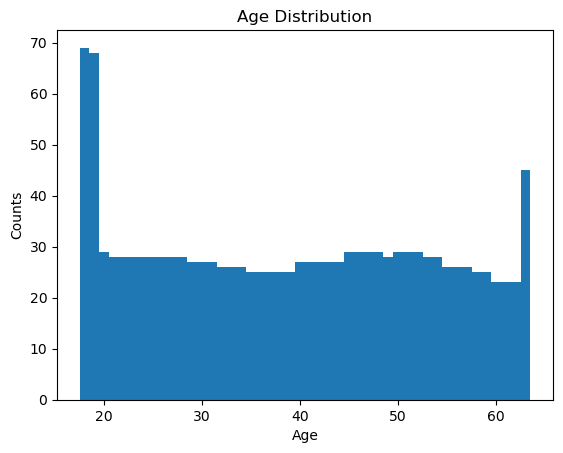

In [4]:
#How does sex and age affect medical cost billed by insurance?

#histogram age, how many in each number
plt.hist(med_cost['age'], bins=46, align='left', range=(18, 64))

plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution')
plt.show()

In [5]:
#mean of average charges for age range

age_mean=med_cost.groupby(med_cost['age'])['charges'].mean()

age_mean

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64

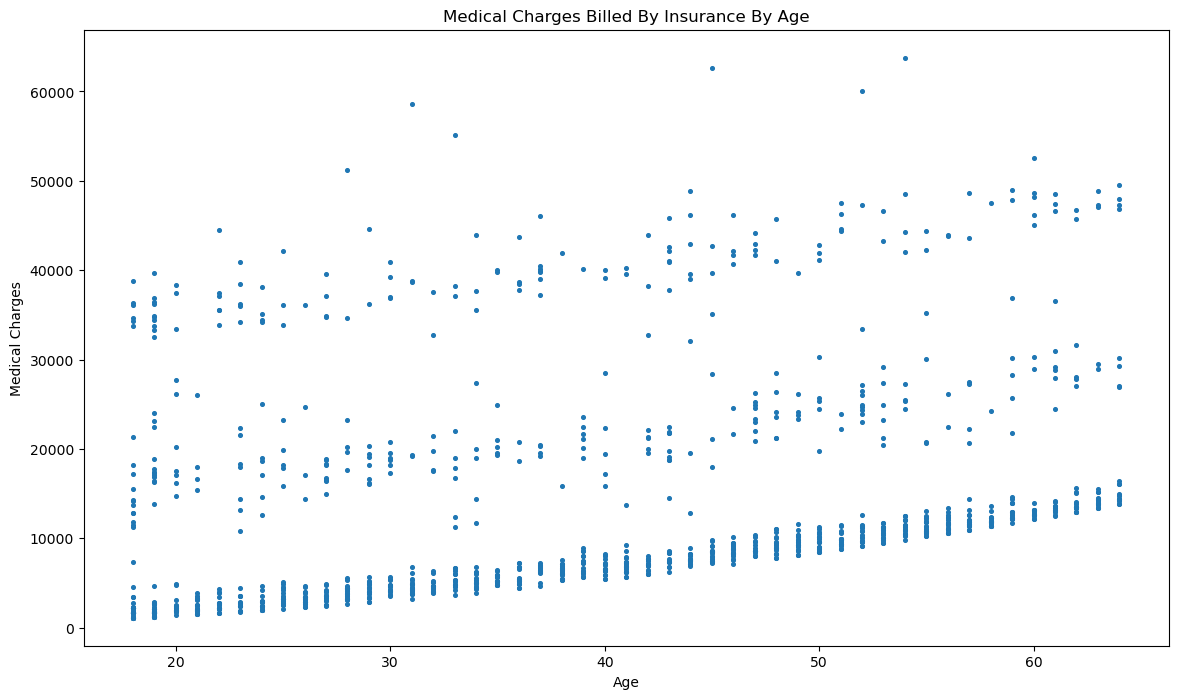

In [6]:
#Create a scatterplot medical charges by age


x= (med_cost['age'])
y= (med_cost['charges'])

plt.figure(figsize=(14,8))

plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.title('Medical Charges Billed By Insurance By Age')


plt.scatter(x,y, s=7)
plt.show()

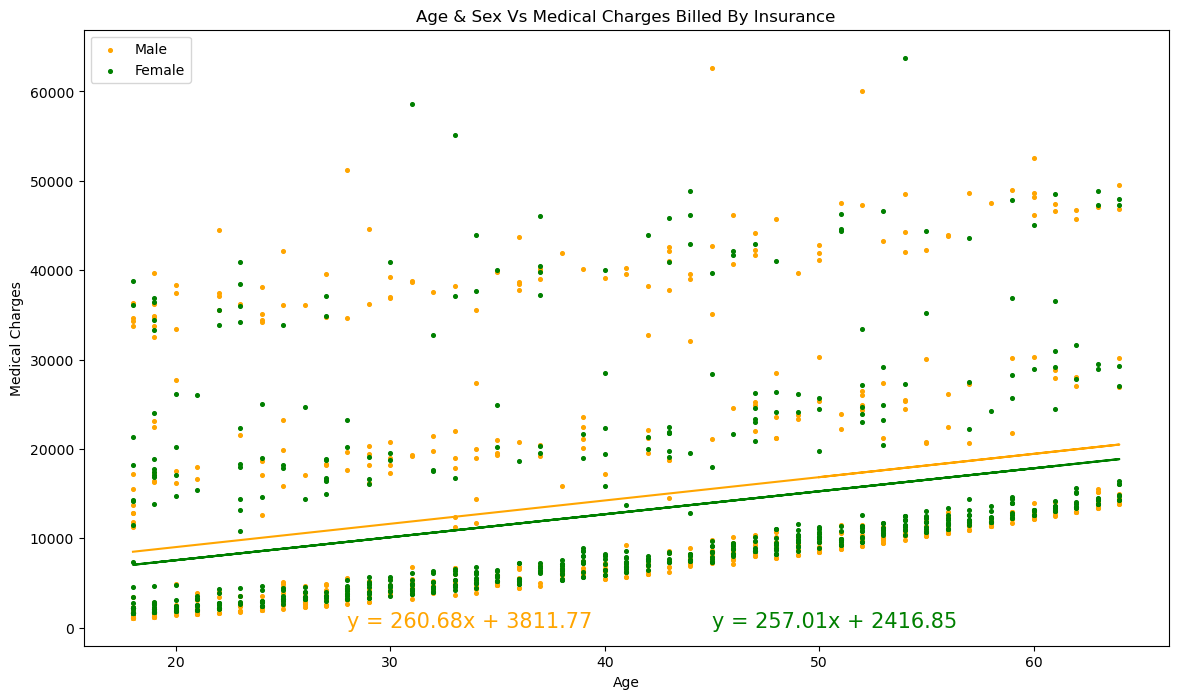

The correlation between males and medical charges billed insurance is: 0.282.
The correlation between females and medical charges billed insurance is: 0.325.


In [7]:
#Create a scatterplot medical charges by sex & age
#data
male= med_cost[med_cost['sex']=='male']['age']
male_y=med_cost[med_cost['sex']=='male']['charges']

female= med_cost[med_cost['sex']=='female']['age']
female_y=med_cost[med_cost['sex']=='female']['charges']

#correlation
male_correlation = stats.pearsonr(male,male_y)
female_correlation = stats.pearsonr(female,female_y)

#linear regression
(mslope, mintercept, mvalue, mvalue, mstderr) = stats.linregress(male, male_y)
male_regression = male * mslope + mintercept
line_eq_m = "y = " + str(round(mslope,2)) + "x + " + str(round(mintercept,2))

(fslope, fintercept, fvalue, fvalue, fstderr) = stats.linregress(female, female_y)
female_regression = female * fslope + fintercept
line_eq_f = "y = " + str(round(fslope,2)) + "x + " + str(round(fintercept,2))

#scatterplot
fig, ax1=plt.subplots(1,1,figsize=(14,8))

ax1.scatter(male,male_y, color = 'orange', label='Male', s=7)
ax1.scatter(female,female_y, color = 'green', label='Female', s=7)


plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.title('Age & Sex Vs Medical Charges Billed By Insurance')


ax1.legend(['Male','Female'],loc='upper left')

plt.annotate(line_eq_m,(28,0.8),fontsize=15,color="orange")
plt.annotate(line_eq_f,(45,0.8),fontsize=15,color="green")
plt.plot(male,male_regression,"orange")
plt.plot(female,female_regression,"green")
plt.show()
print(f"The correlation between males and medical charges billed insurance is: {round(male_correlation[0],3)}.") 
print(f"The correlation between females and medical charges billed insurance is: {round(female_correlation[0],3)}.")

In [8]:
#Conclusion: Correlation is a weak positive and males get charged slightly more
#mention groups,make assumptions,

## BMI Affect on Medical Cost



How does BMI affect medical costs?


In [9]:
med_cost.head()

,Id,age,sex,bmi,children,smoker,region,charges,Age Range,BMI Range,Child Range
0,1,19,female,27.900,0,yes,southwest,16884.92400,18-24,Overweight,No Children
1,2,18,male,33.770,1,no,southeast,1725.55230,18-24,Obesity,1 to 2 Children
2,3,28,male,33.000,3,no,southeast,4449.46200,25-30,Obesity,3 or More Children
3,4,33,male,22.705,0,no,northwest,21984.47061,31-40,Healthy Weight,No Children
4,5,32,male,28.880,0,no,northwest,3866.85520,31-40,Overweight,No Children


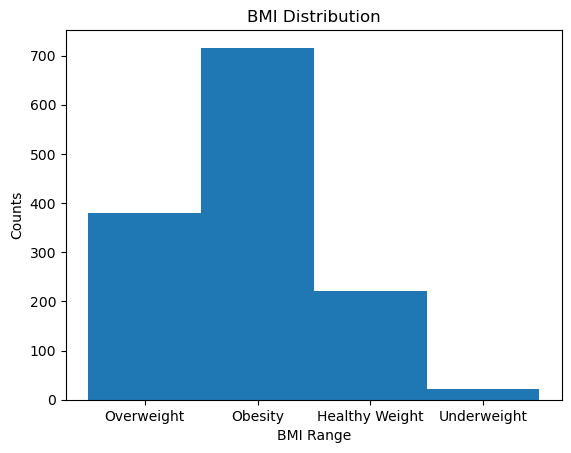

In [10]:

plt.hist(med_cost['BMI Range'],bins=4,align="left",range=(0,4))
plt.xlabel('BMI Range')
plt.ylabel('Counts')
plt.title('BMI Distribution')
plt.show()

In [11]:
bmi_mean = med_cost.groupby(med_cost['BMI Range'])["charges"].mean()
bmi_mean

C:\Users\coope\AppData\Local\Temp\ipykernel_19312\2949656146.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_mean = med_cost.groupby(med_cost['BMI Range'])["charges"].mean()


BMI Range
Underweight        8657.620652
Healthy Weight    10404.900084
Overweight        11006.809989
Obesity           15491.542238
Name: charges, dtype: float64

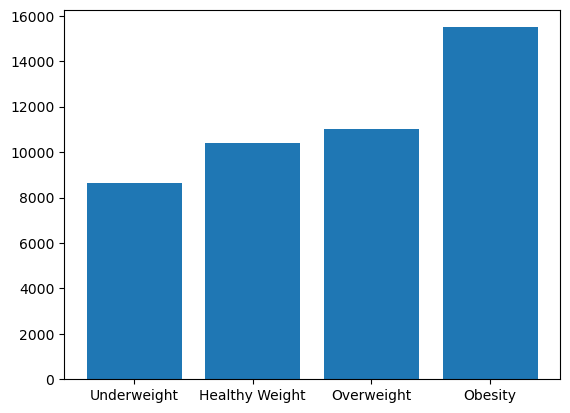

In [12]:
plt.bar(range(len(bmi_mean)), bmi_mean.values)
plt.xticks(range(0,4), labels=bmi_labels)
plt.show()

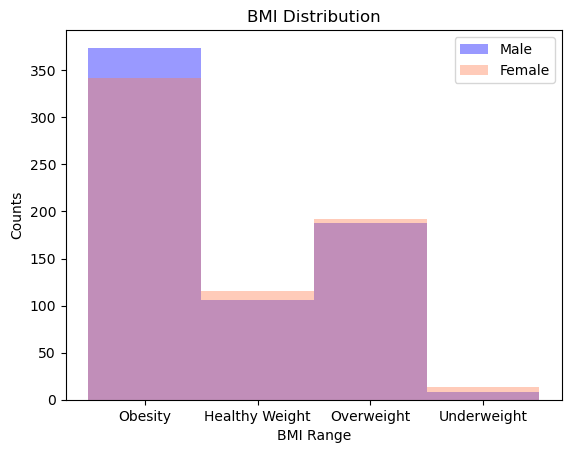

In [13]:
plt.hist(med_cost['BMI Range'][med_cost["sex"]=="male"],bins=4,align="left",range=(0,4), color="blue", alpha=0.4, label="Male")
plt.hist(med_cost['BMI Range'][med_cost["sex"]=="female"],bins=4,align="left",range=(0,4), color="coral", alpha=0.4, label="Female")
plt.legend()
plt.xlabel('BMI Range')
plt.ylabel('Counts')
plt.title('BMI Distribution')
plt.show()

In [14]:
female_bmi_mean = med_cost.groupby(med_cost['BMI Range'][med_cost["sex"]=="female"])["charges"].mean()
female_bmi_mean

C:\Users\coope\AppData\Local\Temp\ipykernel_19312\4172134520.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  female_bmi_mean = med_cost.groupby(med_cost['BMI Range'][med_cost["sex"]=="female"])["charges"].mean()


BMI Range
Underweight       10532.029435
Healthy Weight    10987.580283
Overweight        10660.361642
Obesity           14250.829369
Name: charges, dtype: float64

In [15]:
male_bmi_mean = med_cost.groupby(med_cost['BMI Range'][med_cost["sex"]=="male"])["charges"].mean()
male_bmi_mean

C:\Users\coope\AppData\Local\Temp\ipykernel_19312\2936465669.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  male_bmi_mean = med_cost.groupby(med_cost['BMI Range'][med_cost["sex"]=="male"])["charges"].mean()


BMI Range
Underweight        5611.706381
Healthy Weight     9772.747038
Overweight        11360.629578
Obesity           16626.097857
Name: charges, dtype: float64

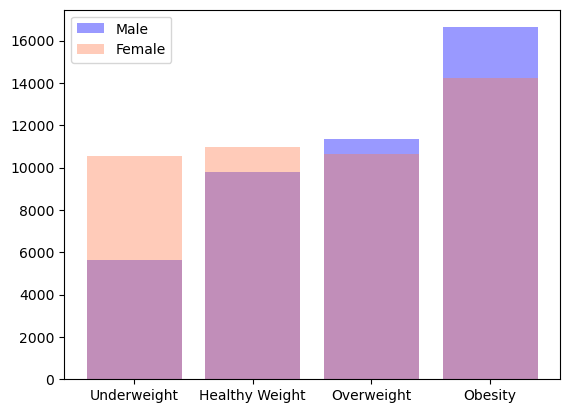

In [16]:
plt.bar(range(len(bmi_mean)),male_bmi_mean.values, color="blue", alpha=0.4, label="Male")
plt.bar(range(len(bmi_mean)),female_bmi_mean.values, color="coral", alpha=0.4, label="Female")
plt.legend()
plt.xticks(range(0,4), labels=bmi_labels)
plt.show()

# Number of Children Affect on Medical Cost

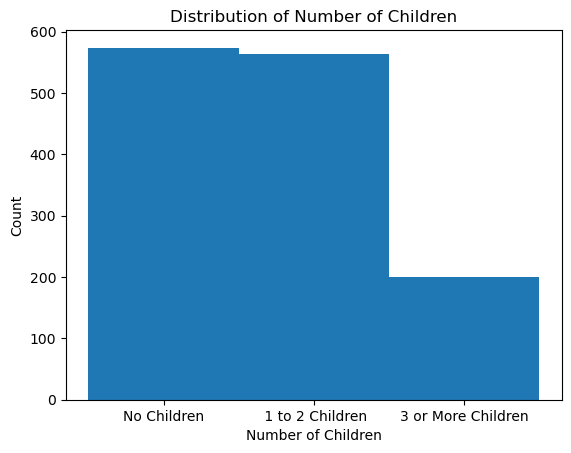

In [19]:
#Histogram number of children
plt.hist(med_cost['Child Range'], bins=3, align='left', range=(0,3))



plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Distribution of Number of Children')
plt.show()

In [20]:
#Finding the mean

child_mean= med_cost.groupby(med_cost['Child Range'])['charges'].mean()
child_mean

C:\Users\coope\AppData\Local\Temp\ipykernel_19312\1560396872.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  child_mean= med_cost.groupby(med_cost['Child Range'])['charges'].mean()


Child Range
No Children           12365.975602
 1 to 2 Children      13727.934343
3 or More Children    14576.000129
Name: charges, dtype: float64

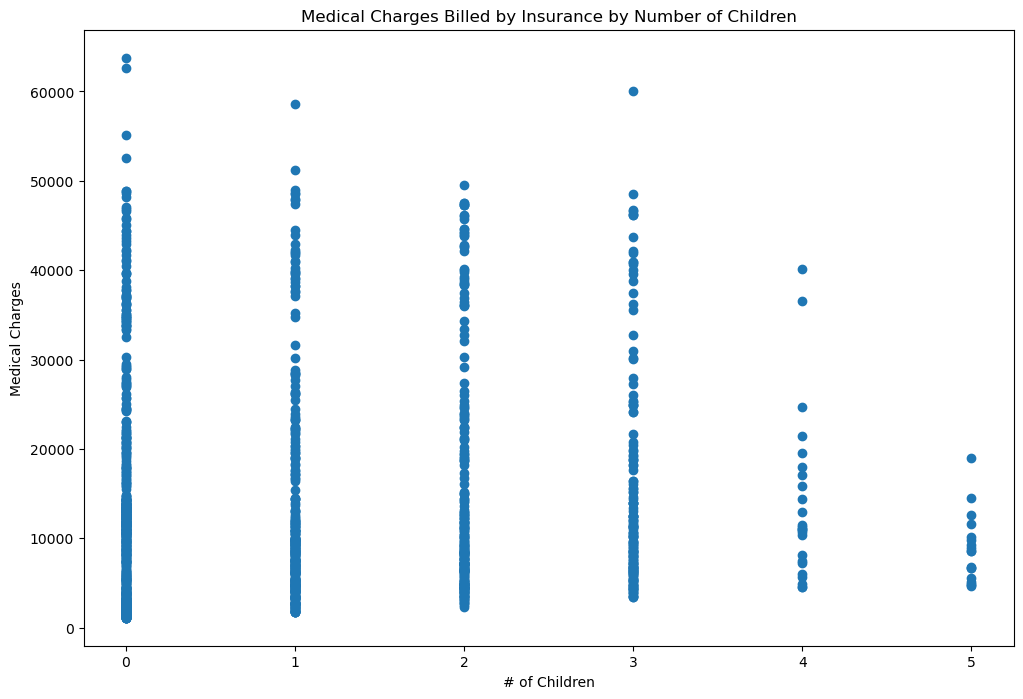

In [21]:
#Create a scatterplot for actaul number of children and cost

x=(med_cost['children'])
y=(med_cost['charges'])

plt.figure(figsize= (12,8))

plt.xlabel('# of Children')
plt.ylabel('Medical Charges')
plt.title('Medical Charges Billed by Insurance by Number of Children')

plt.scatter(x,y)
plt.show()

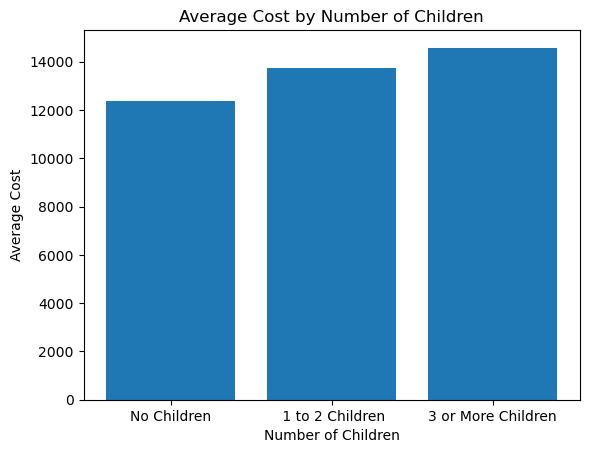

In [22]:
plt.bar(child_labels, child_mean.values)

plt.xlabel('Number of Children')
plt.ylabel('Average Cost')
plt.title('Average Cost by Number of Children')
plt.show()